In [1]:
## importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## reading the dataset 
df = pd.read_excel("Quickfreightdata.xlsx")


print("dimentions of the file : ",df.shape,end="\n")
print("\n")
df.info()

dimentions of the file :  (18739, 13)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18739 entries, 0 to 18738
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ORDER_NBR                 18739 non-null  int64         
 1   EQUIPMENT_TYPE            17728 non-null  object        
 2   CUSTOMER_MILES            18739 non-null  int64         
 3   WEIGHT                    18739 non-null  int64         
 4   ORDER_COST                18733 non-null  float64       
 5   FIRST_PICK_ZIP            18739 non-null  object        
 6   FIRST_PICK_EARLY_APPT     18479 non-null  datetime64[ns]
 7   FIRST_PICK_LATE_APPT      18435 non-null  datetime64[ns]
 8   LAST_DELIVERY_ZIP         18739 non-null  object        
 9   LAST_DELIVERY_EARLY_APPT  18410 non-null  datetime64[ns]
 10  LAST_DELIVERY_LATE_APPT   18353 non-null  datetime64[ns]
 11  IS_HAZARDOUS              18739 non-null

In [3]:
df.head()

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE
0,535361133,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00
1,1499443993,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00
2,1058279607,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00
3,2093496262,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00
4,2373724838,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00


In [4]:
df.describe()

,ORDER_NBR,CUSTOMER_MILES,WEIGHT,ORDER_COST
count,1.873900e+04,18739.000000,18739.000000,18733.000000
mean,1.417056e+09,588.220556,25219.585837,954.230941
std,6.642482e+08,511.968568,16309.867000,938.818390
min,5.322560e+05,0.000000,0.000000,0.000000
25%,8.640125e+08,254.000000,8000.000000,400.000000
50%,1.417617e+09,436.000000,28192.000000,700.000000
75%,1.973634e+09,716.000000,42000.000000,1300.000000
max,2.821138e+09,3733.000000,300000.000000,8000.000000


In [5]:
df.drop_duplicates(subset="ORDER_NBR",
                     keep=False, inplace=True)

In [6]:
df.isnull().sum()

ORDER_NBR                      0
EQUIPMENT_TYPE              1011
CUSTOMER_MILES                 0
WEIGHT                         0
ORDER_COST                     6
FIRST_PICK_ZIP                 0
FIRST_PICK_EARLY_APPT        260
FIRST_PICK_LATE_APPT         304
LAST_DELIVERY_ZIP              0
LAST_DELIVERY_EARLY_APPT     329
LAST_DELIVERY_LATE_APPT      386
IS_HAZARDOUS                   0
CREATED_DATE                   0
dtype: int64

In [7]:
print(df.LAST_DELIVERY_LATE_APPT.isnull().sum()*100/18739)

2.0598751267410216


In [8]:
## dropping the rows containing na values  since 2% of na value is negligible.
##["FIRST_PICK_EARLY_APPT","FIRST_PICK_LATE_APPT","LAST_DELIVERY_EARLY_APPT","LAST_DELIVERY_LATE_APPT"]

nacols = ["FIRST_PICK_EARLY_APPT","FIRST_PICK_LATE_APPT","LAST_DELIVERY_EARLY_APPT",
          "LAST_DELIVERY_LATE_APPT","ORDER_COST"]

df = df.dropna(subset=nacols)
df.isnull().sum()

ORDER_NBR                     0
EQUIPMENT_TYPE              953
CUSTOMER_MILES                0
WEIGHT                        0
ORDER_COST                    0
FIRST_PICK_ZIP                0
FIRST_PICK_EARLY_APPT         0
FIRST_PICK_LATE_APPT          0
LAST_DELIVERY_ZIP             0
LAST_DELIVERY_EARLY_APPT      0
LAST_DELIVERY_LATE_APPT       0
IS_HAZARDOUS                  0
CREATED_DATE                  0
dtype: int64

In [9]:
df.head()

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE
0,535361133,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00
1,1499443993,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00
2,1058279607,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00
3,2093496262,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00
4,2373724838,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00


In [10]:
## extracting the pickup delay and delivery delay from dataset

df["pickup_delay"] = df["FIRST_PICK_LATE_APPT"] - df["FIRST_PICK_EARLY_APPT"]
df["delivery_delay"] = df["LAST_DELIVERY_LATE_APPT"] - df["LAST_DELIVERY_EARLY_APPT"]

In [11]:
df.pickup_delay.max()

Timedelta('1827 days 05:00:00')

In [12]:
df['pickup_delay'] = df['pickup_delay'] / pd.Timedelta(hours=1)
df['delivery_delay'] = df['delivery_delay'] / pd.Timedelta(hours=1)

In [13]:
from scipy import stats
IQR = stats.iqr(df.pickup_delay, interpolation = 'midpoint')
MAXPICK = 1.5*IQR + df.pickup_delay.quantile(0.75)
print("Maximum pickup delay delay is :",format(MAXPICK, ".2f"),"\n")

IQR = stats.iqr(df.delivery_delay, interpolation = 'midpoint')
MAXDEL = 1.5*IQR + df.delivery_delay.quantile(0.75)
print("Maximum delivery delay is : ",format(MAXDEL, ".2f"),"\n")

IQR = stats.iqr(df.WEIGHT, interpolation = 'midpoint')
MAXWGT = 1.5*IQR + df.WEIGHT.quantile(0.75)
print("Maximum weight is :",format(MAXWGT, ".2f")  )

Maximum pickup delay delay is : 20.00 

Maximum delivery delay is :  17.50 

Maximum weight is : 93000.00


In [14]:
## dropping the zip code, order number, order created date columns since they dont contribute to the model prediction
df.drop(columns=["LAST_DELIVERY_ZIP","FIRST_PICK_ZIP","ORDER_NBR","CREATED_DATE","FIRST_PICK_LATE_APPT",
                 "FIRST_PICK_EARLY_APPT","LAST_DELIVERY_LATE_APPT","LAST_DELIVERY_EARLY_APPT"], inplace = True)
## binary encoding the IS_HAZARDOUS column
df.IS_HAZARDOUS.replace(["N","Y"],[0,1],inplace = True)

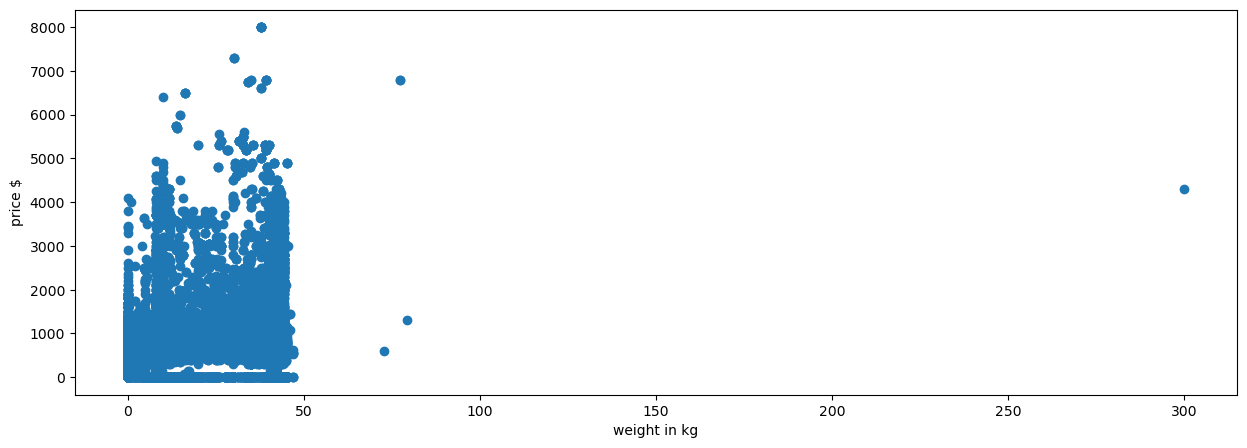

In [15]:
plt.figure(figsize=(15,5))
plt.scatter(df.WEIGHT/1000,df.ORDER_COST)
plt.xlabel("weight in kg")
plt.ylabel("price $")
plt.show()

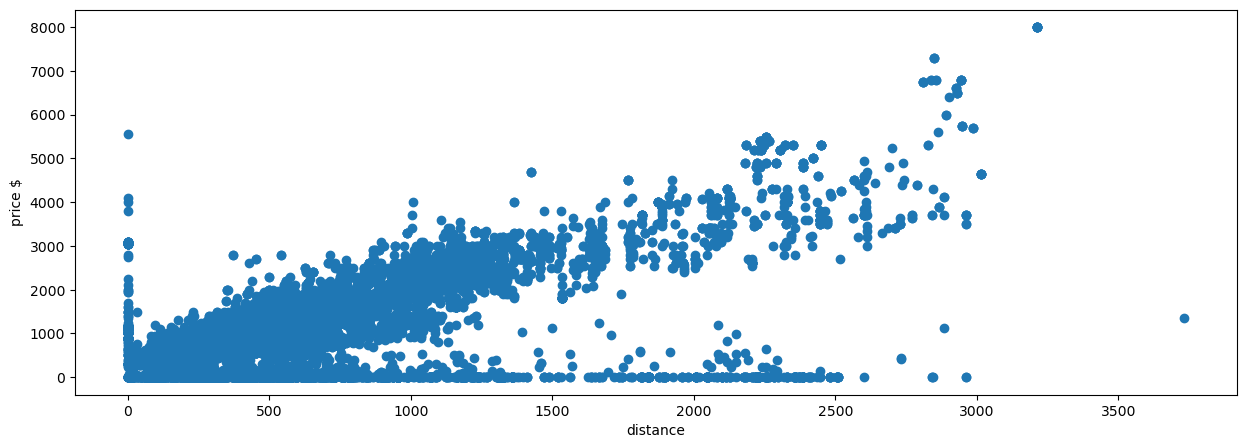

In [16]:
plt.figure(figsize=(15,5))
plt.scatter(df.CUSTOMER_MILES,df.ORDER_COST)
plt.xlabel("distance")
plt.ylabel("price $")
plt.show()

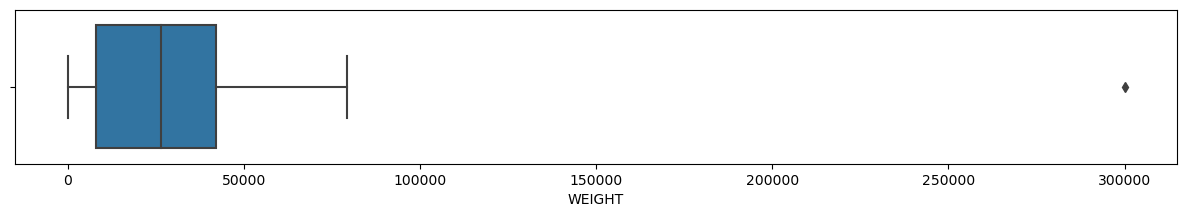

In [17]:
plt.figure(figsize=(15,2))
sns.boxplot(df.WEIGHT)
plt.show()

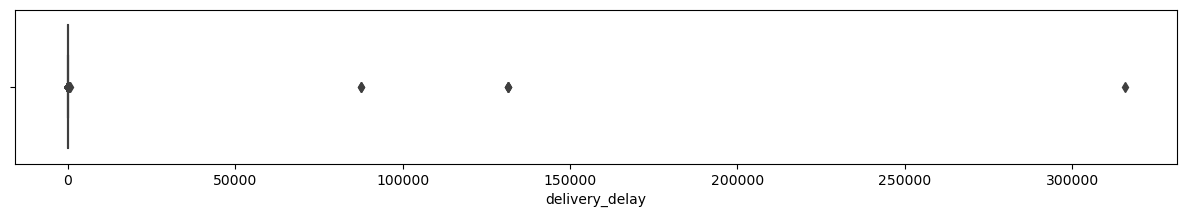

In [18]:
plt.figure(figsize=(15,2))
sns.boxplot(df.delivery_delay)
plt.show()

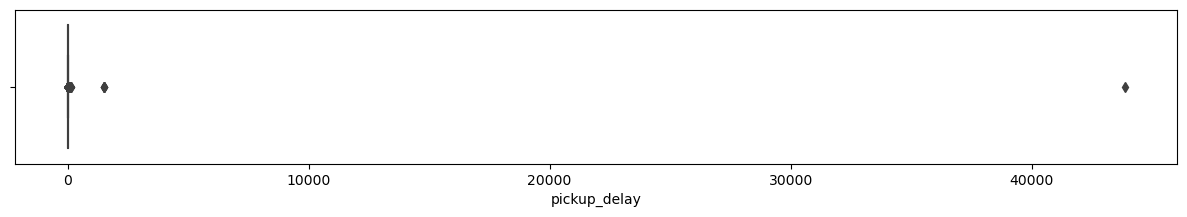

In [19]:
plt.figure(figsize=(15,2))
sns.boxplot(df.pickup_delay)
plt.show()

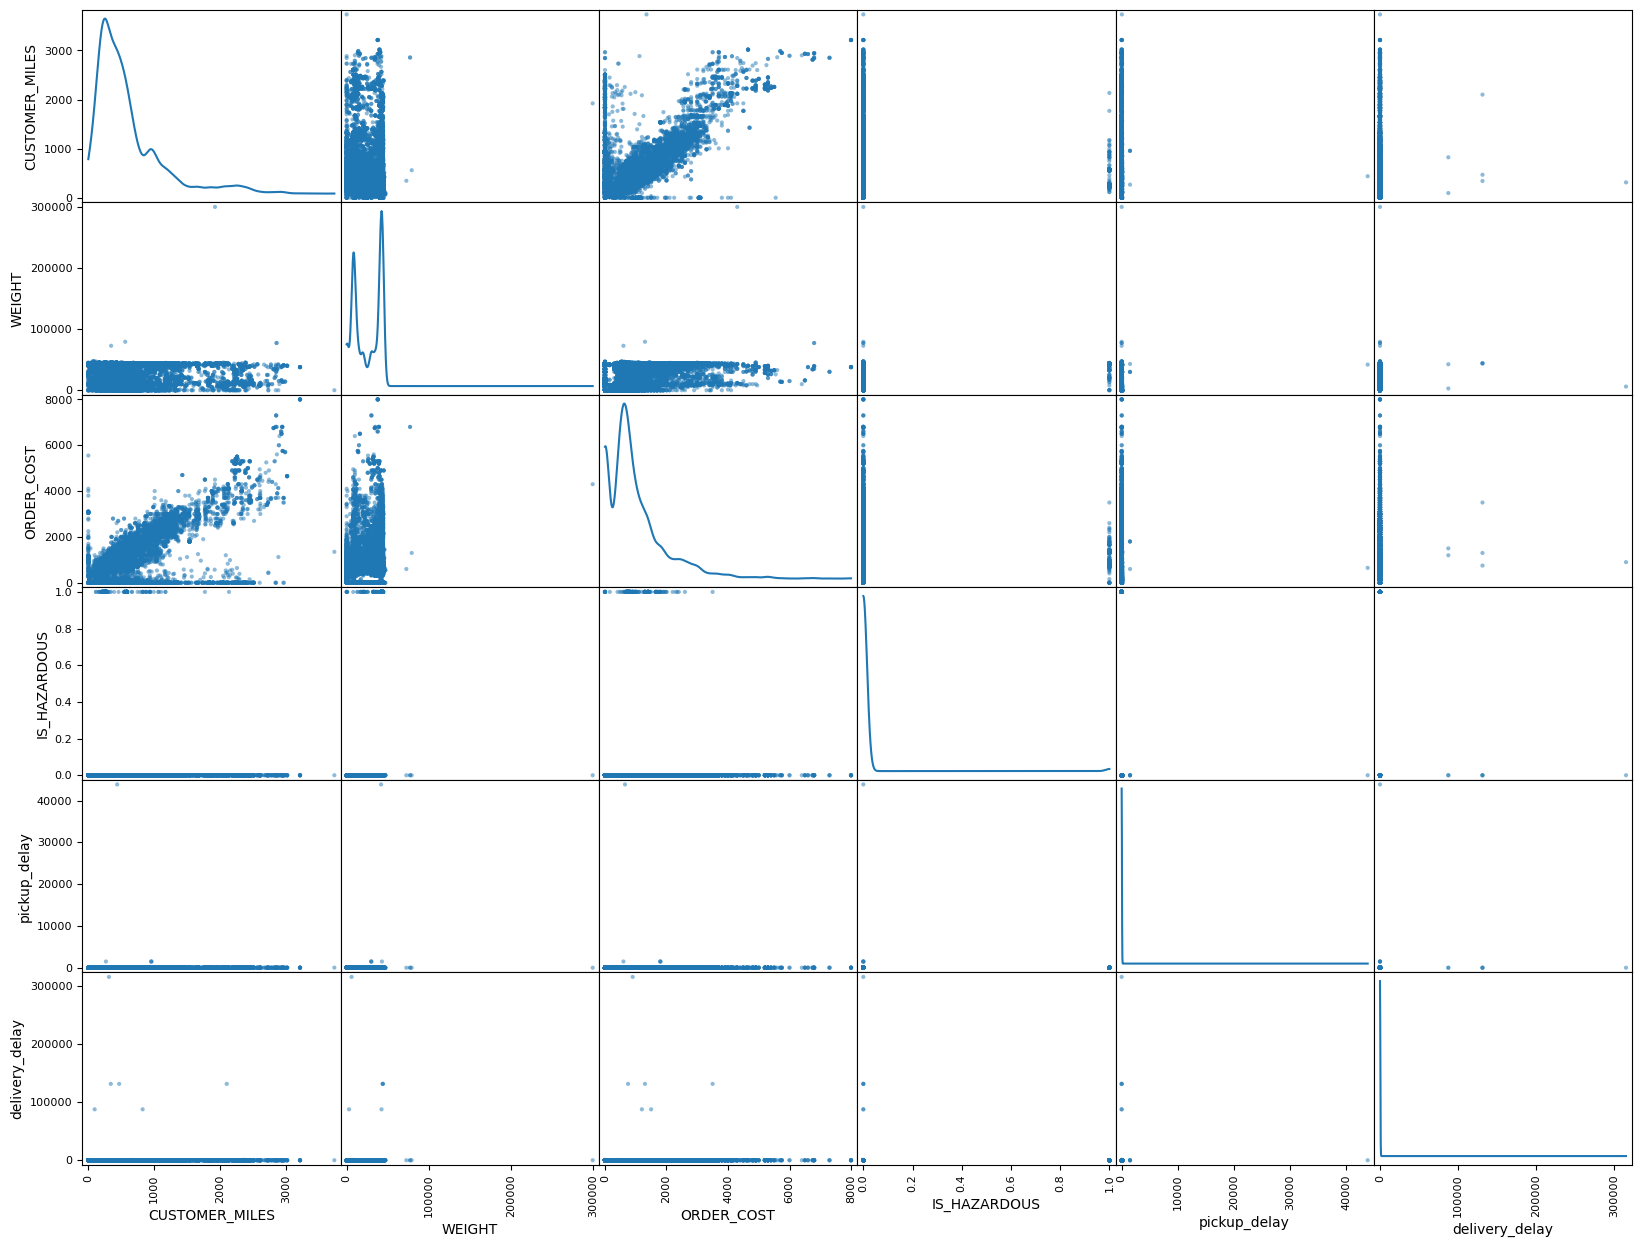

In [20]:
pd.plotting.scatter_matrix(df.loc[:, "EQUIPMENT_TYPE":"delivery_delay"], diagonal="kde",figsize=(20,15))
plt.show()

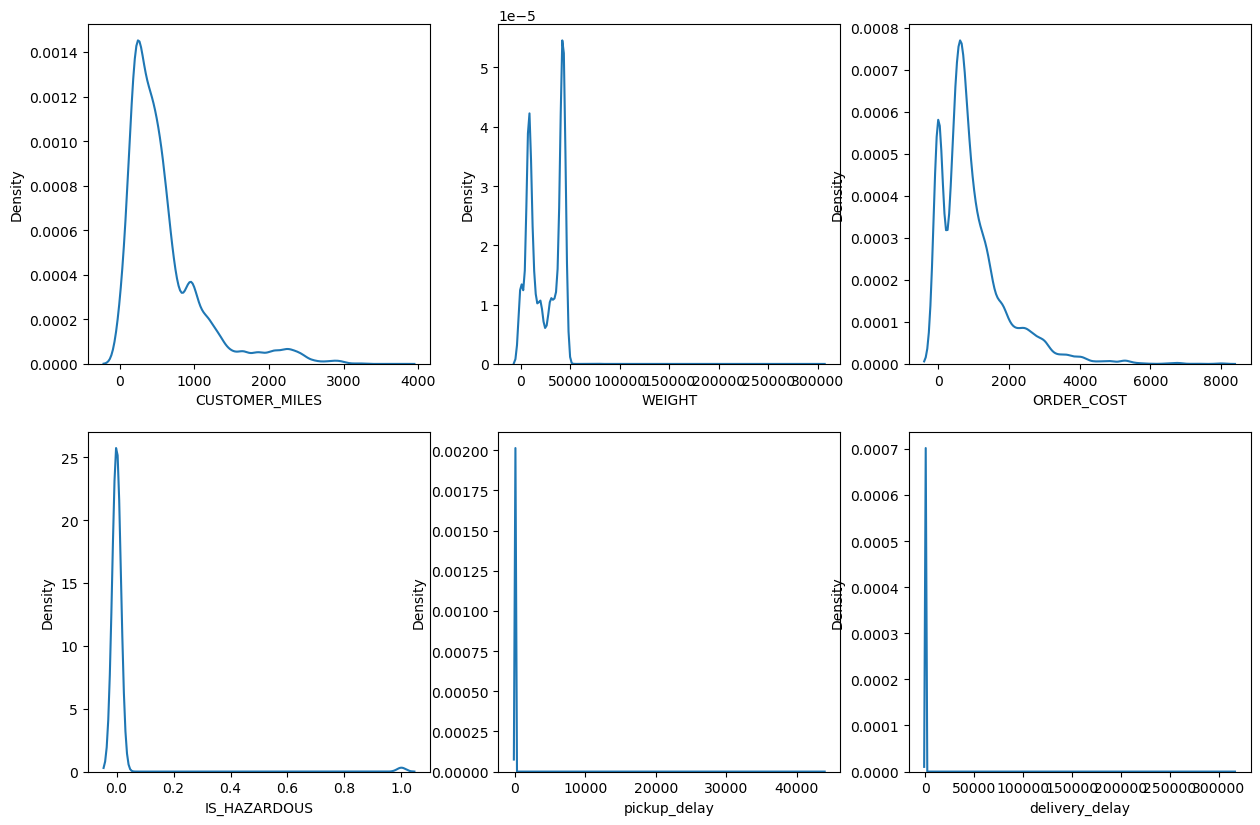

In [21]:
col = df.columns.tolist()
x=1
f = plt.figure(figsize=(15,15))
for i in col:
    if(df[i].dtype == "int64" or df[i].dtype == "float64"):
        f.add_subplot(3, 3, x)
        sns.distplot(df[i], hist=False)
        x+=1
plt.show()

In [22]:
old_skew = df.skew().sort_values(ascending=False)
old_skew

pickup_delay      134.283231
delivery_delay     78.681110
IS_HAZARDOUS        9.007519
CUSTOMER_MILES      1.975876
ORDER_COST          1.945852
WEIGHT              0.162291
dtype: float64

In [23]:
df.head()

,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,IS_HAZARDOUS,pickup_delay,delivery_delay
0,53 FLATBED,802,42000,0.00,0,7.5,8.0
1,V,0,40500,875.00,0,0.0,9.0
2,NaN,774,0,88.14,0,33.0,9.0
3,V,0,40500,875.00,0,0.0,9.0
4,V,0,40500,875.00,0,0.0,9.0


# outliers 

In [24]:
drp = df[df["pickup_delay"]>35].index
df.drop(drp, inplace = True)

drp = df[df["delivery_delay"]>20].index
df.drop(drp, inplace = True)

drp = df[df["WEIGHT"]>93000].index
df.drop(drp, inplace = True)

df.reset_index(drop=True,inplace=True)

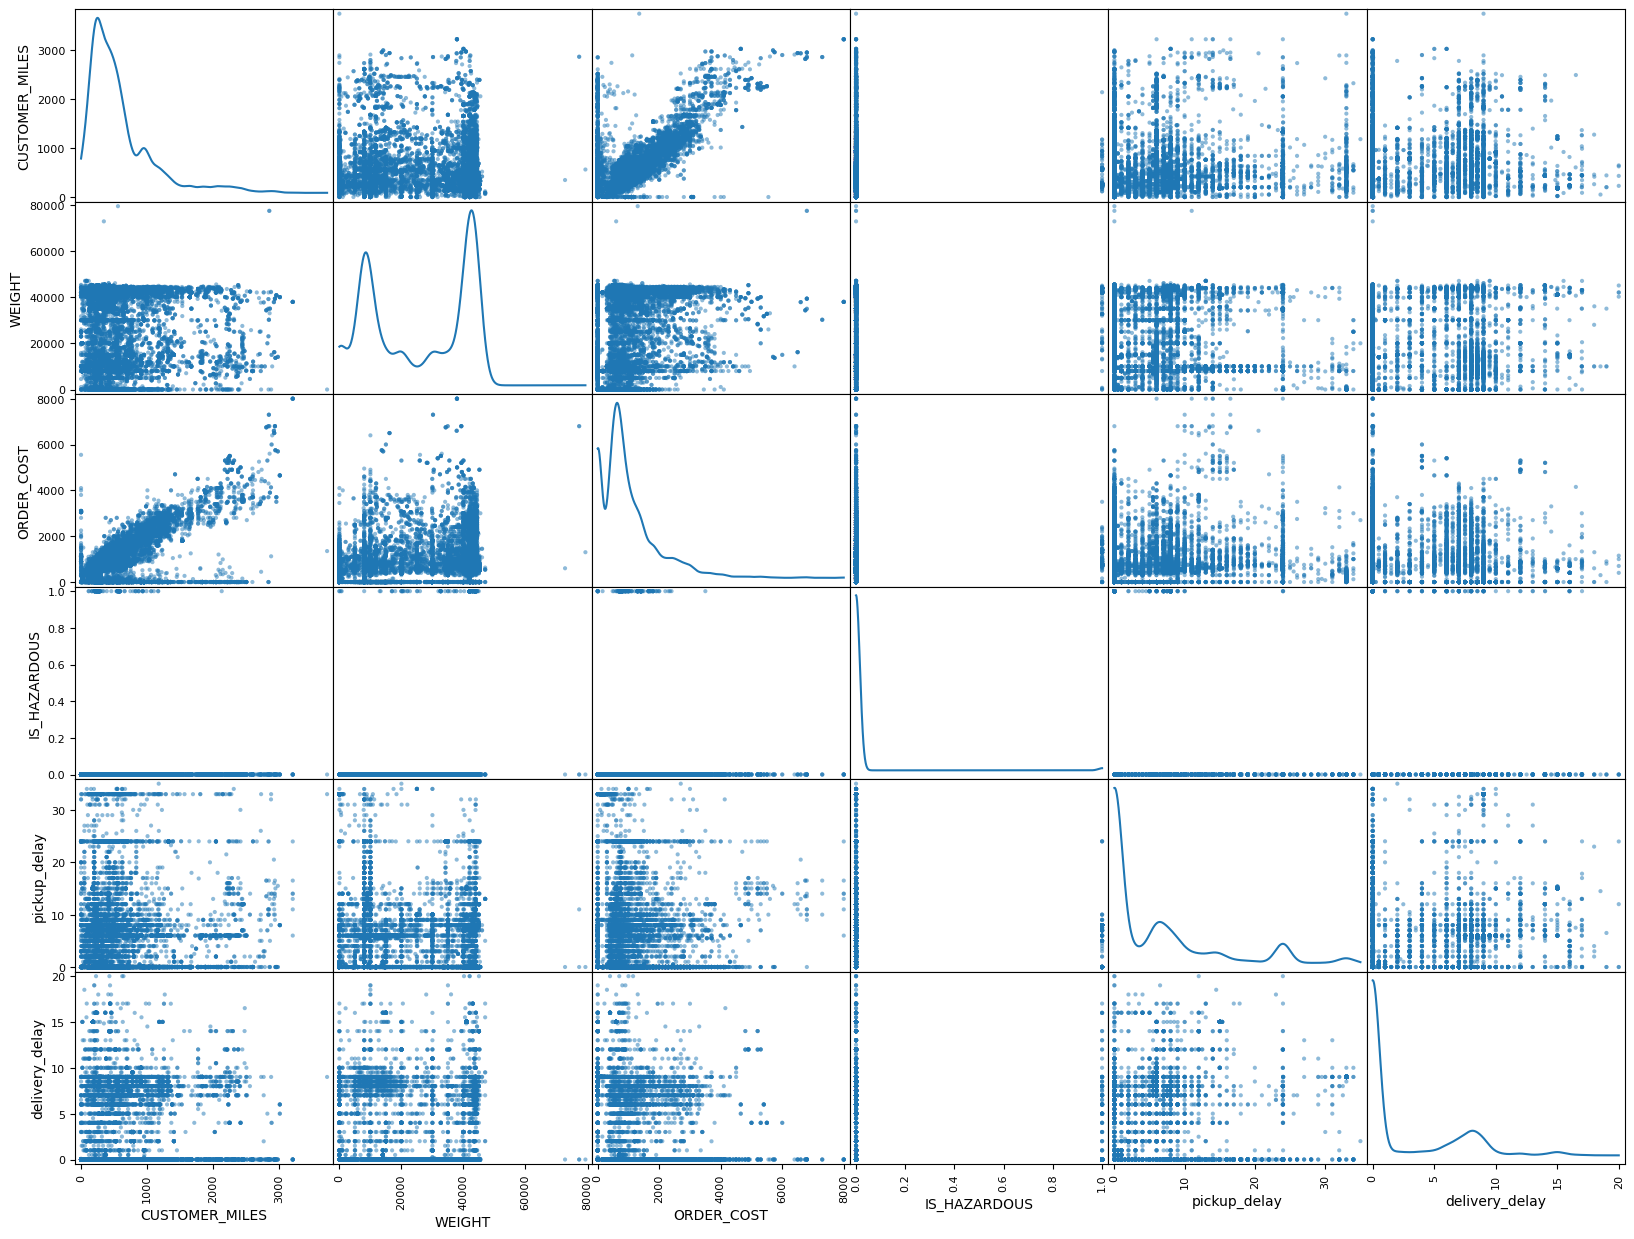

In [25]:
pd.plotting.scatter_matrix(df.loc[:, "EQUIPMENT_TYPE":"delivery_delay"], diagonal="kde",figsize=(20,15))
plt.show()

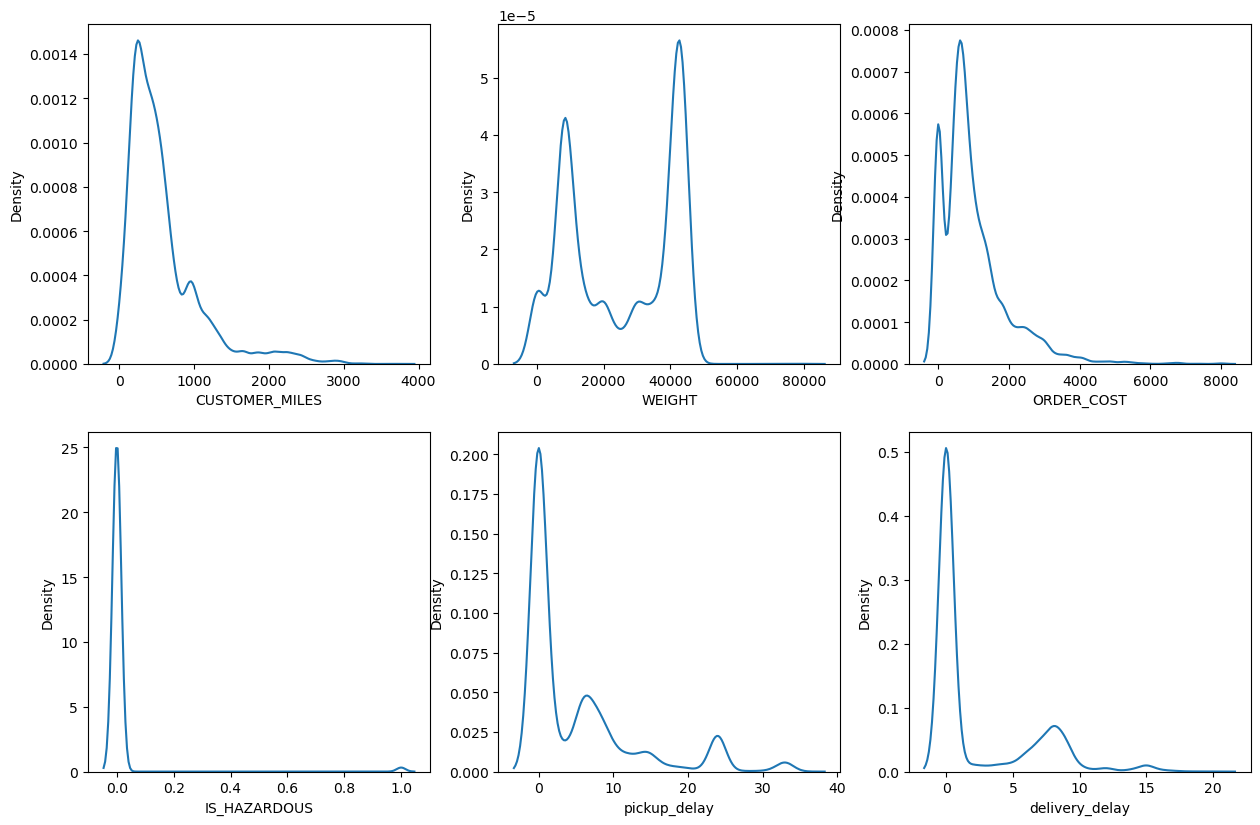

In [26]:
col = df.columns.tolist()
x=1
f = plt.figure(figsize=(15,15))
for i in col:
    if(df[i].dtype == "int64" or df[i].dtype == "float64"):
        f.add_subplot(3, 3, x)
        sns.distplot(df[i], hist=False)
        x+=1
plt.show()

In [27]:
## since skewness is in the range of ±2 we can say the dataset is normally distributed

from scipy.stats import kurtosis
new_skew = df.skew().sort_values(ascending=False)
print("Old skewness: \n",old_skew,"\n")
print("New skewness: \n",new_skew)

Old skewness: 
 pickup_delay      134.283231
delivery_delay     78.681110
IS_HAZARDOUS        9.007519
CUSTOMER_MILES      1.975876
ORDER_COST          1.945852
WEIGHT              0.162291
dtype: float64 

New skewness: 
 IS_HAZARDOUS      8.904306
CUSTOMER_MILES    1.998435
ORDER_COST        1.923539
pickup_delay      1.786485
delivery_delay    1.473956
WEIGHT           -0.108383
dtype: float64


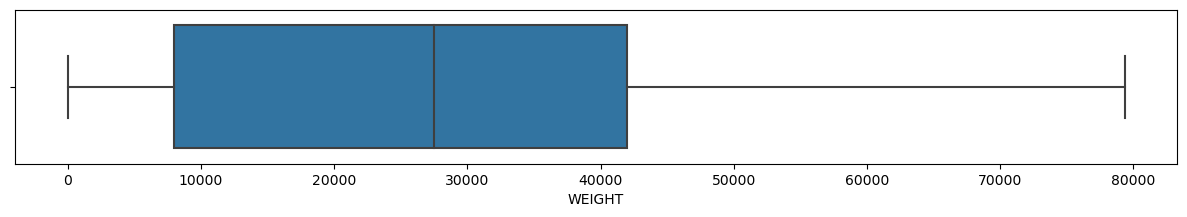

In [28]:
plt.figure(figsize=(15,2))
sns.boxplot(df.WEIGHT)
plt.show()

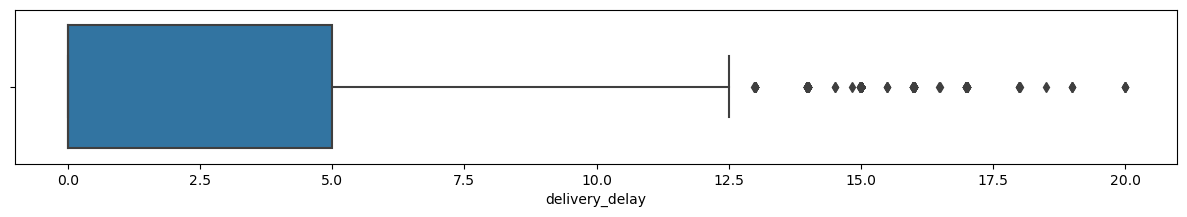

In [29]:
plt.figure(figsize=(15,2))
sns.boxplot(df.delivery_delay)
plt.show()

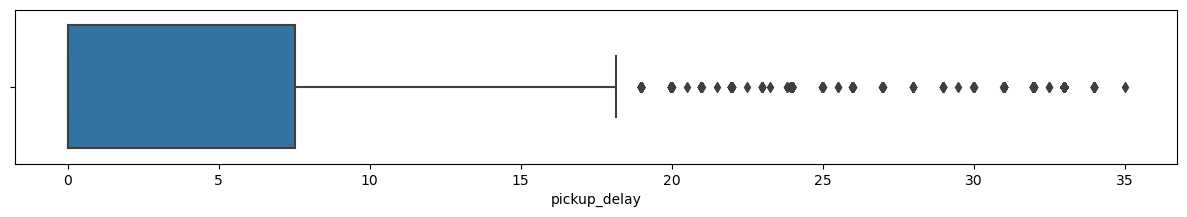

In [30]:
plt.figure(figsize=(15,2))
sns.boxplot(df.pickup_delay)
plt.show()

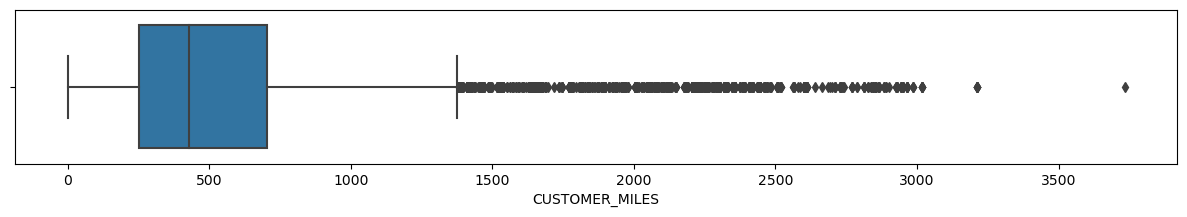

In [31]:
plt.figure(figsize=(15,2))
sns.boxplot(df.CUSTOMER_MILES)
plt.show()

In [32]:
df.EQUIPMENT_TYPE.value_counts()

V             10935
VR             2850
R              2318
VZ              208
F                46
LTL              37
DROP             26
POWER            22
RAIL             16
SB               10
IMDL             10
RM               10
VM               10
SD                6
VCAR              4
VOLUME LTL        3
FH                2
DRAY              2
PARTIAL           1
VS                1
VV                1
53 FLATBED        1
VP                1
V/R               1
PO                1
VA                1
V-DROP            1
D-LTL             1
Name: EQUIPMENT_TYPE, dtype: int64

In [33]:
df.isnull().sum()

EQUIPMENT_TYPE    832
CUSTOMER_MILES      0
WEIGHT              0
ORDER_COST          0
IS_HAZARDOUS        0
pickup_delay        0
delivery_delay      0
dtype: int64

In [34]:
df.fillna(value = df.EQUIPMENT_TYPE.mode()[0],inplace=True)

In [35]:
df.isnull().sum()

EQUIPMENT_TYPE    0
CUSTOMER_MILES    0
WEIGHT            0
ORDER_COST        0
IS_HAZARDOUS      0
pickup_delay      0
delivery_delay    0
dtype: int64

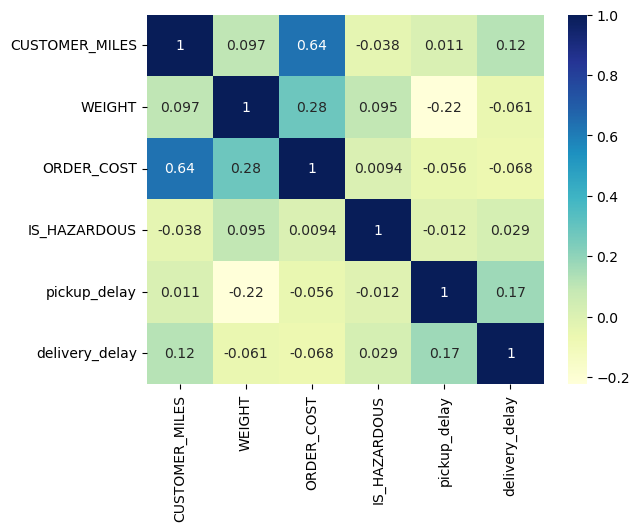

In [36]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [37]:
df.head()

,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,IS_HAZARDOUS,pickup_delay,delivery_delay
0,53 FLATBED,802,42000,0.00,0,7.5,8.0
1,V,0,40500,875.00,0,0.0,9.0
2,V,774,0,88.14,0,33.0,9.0
3,V,0,40500,875.00,0,0.0,9.0
4,V,0,40500,875.00,0,0.0,9.0


In [38]:
df = pd.get_dummies(df, columns=['EQUIPMENT_TYPE'])

In [39]:
df.describe()

,CUSTOMER_MILES,WEIGHT,ORDER_COST,IS_HAZARDOUS,pickup_delay,delivery_delay,EQUIPMENT_TYPE_53 FLATBED,EQUIPMENT_TYPE_D-LTL,EQUIPMENT_TYPE_DRAY,EQUIPMENT_TYPE_DROP,...,EQUIPMENT_TYPE_V/R,EQUIPMENT_TYPE_VA,EQUIPMENT_TYPE_VCAR,EQUIPMENT_TYPE_VM,EQUIPMENT_TYPE_VOLUME LTL,EQUIPMENT_TYPE_VP,EQUIPMENT_TYPE_VR,EQUIPMENT_TYPE_VS,EQUIPMENT_TYPE_VV,EQUIPMENT_TYPE_VZ
count,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,...,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000
mean,577.643832,25211.932246,965.291148,0.012156,5.039138,2.301948,0.000058,0.000058,0.000115,0.001498,...,0.000058,0.000058,0.000230,0.000576,0.000173,0.000058,0.164199,0.000058,0.000058,0.011984
std,497.771424,16115.457166,924.399786,0.109587,7.754902,3.881601,0.007590,0.007590,0.010734,0.038676,...,0.007590,0.007590,0.015179,0.023997,0.013146,0.007590,0.370467,0.007590,0.007590,0.108815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,252.000000,8000.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,430.000000,27500.000000,725.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,703.000000,42000.000000,1300.000000,0.000000,7.516667,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3733.000000,79328.000000,8000.000000,1.000000,35.000000,19.983333,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection

In [40]:
pd.set_option('display.max_columns', None)
df.corr()*100

,CUSTOMER_MILES,WEIGHT,ORDER_COST,IS_HAZARDOUS,pickup_delay,delivery_delay,EQUIPMENT_TYPE_53 FLATBED,EQUIPMENT_TYPE_D-LTL,EQUIPMENT_TYPE_DRAY,EQUIPMENT_TYPE_DROP,EQUIPMENT_TYPE_F,EQUIPMENT_TYPE_FH,EQUIPMENT_TYPE_IMDL,EQUIPMENT_TYPE_LTL,EQUIPMENT_TYPE_PARTIAL,EQUIPMENT_TYPE_PO,EQUIPMENT_TYPE_POWER,EQUIPMENT_TYPE_R,EQUIPMENT_TYPE_RAIL,EQUIPMENT_TYPE_RM,EQUIPMENT_TYPE_SB,EQUIPMENT_TYPE_SD,EQUIPMENT_TYPE_V,EQUIPMENT_TYPE_V-DROP,EQUIPMENT_TYPE_V/R,EQUIPMENT_TYPE_VA,EQUIPMENT_TYPE_VCAR,EQUIPMENT_TYPE_VM,EQUIPMENT_TYPE_VOLUME LTL,EQUIPMENT_TYPE_VP,EQUIPMENT_TYPE_VR,EQUIPMENT_TYPE_VS,EQUIPMENT_TYPE_VV,EQUIPMENT_TYPE_VZ
CUSTOMER_MILES,100.000000,9.719625,63.517043,-3.761337,1.096299,11.581390,0.342134,1.104612,-0.296853,-0.403357,-0.243735,0.024492,2.186804,-1.412620,0.038667,-0.565216,-4.011561,17.567218,1.482785,9.072961,-1.078284,3.986919,-15.365459,-0.705512,-0.533192,-0.190077,-1.496551,2.481525,0.137416,2.300179,3.858022,-0.203801,-0.496593,-3.645395
WEIGHT,9.719625,100.000000,27.982325,9.524504,-22.451726,-6.110830,0.790762,-1.092401,0.652033,-1.252690,4.189016,-1.446342,2.234997,-5.540345,-1.093154,-1.187548,-1.152174,20.890994,2.434009,1.536933,-3.085875,0.275569,-37.318477,0.225531,-0.481009,-1.187548,-2.125636,-1.098182,-1.271910,-1.093343,25.473813,-1.074502,0.696557,9.686856
ORDER_COST,63.517043,27.982325,100.000000,0.936582,-5.601551,-6.775309,-0.792659,-0.469598,-0.035759,-0.357381,2.079059,0.330641,-0.811148,-3.315488,0.028502,0.028502,-3.720150,29.417280,-3.172005,9.051217,-0.578680,2.316237,-30.629720,-0.792659,-0.792659,0.192734,-1.365775,2.635615,-0.508557,0.192734,11.414967,-0.135731,-0.365655,1.115206
IS_HAZARDOUS,-3.761337,9.524504,0.936582,100.000000,-1.157923,2.863940,-0.084204,-0.084204,-0.119086,-0.429670,-0.571844,-0.119086,-0.266347,0.627200,-0.084204,-0.084204,-0.395193,-4.355189,-0.336963,-0.266347,-0.266347,-0.206288,-15.644782,-0.084204,-0.084204,-0.084204,-0.168423,-0.266347,-0.145855,-0.084204,-4.916923,-0.084204,-0.084204,98.311527
pickup_delay,1.096299,-22.451726,-5.601551,-1.157923,100.000000,16.811713,0.240879,-0.101715,0.443335,2.093602,1.166186,-0.386108,0.823847,12.598135,0.240879,-0.003831,1.193151,-9.130661,-0.957871,-0.074041,-1.126737,-0.049352,16.226117,0.191937,-0.101715,0.191937,-0.864221,0.265505,4.458173,-0.493251,-13.762837,-0.493251,0.191937,-1.417743
delivery_delay,11.581390,-6.110830,-6.775309,2.863940,16.811713,100.000000,1.114303,1.114303,4.060424,8.856762,4.766900,-0.636649,0.243130,6.672439,2.773291,1.309861,6.230951,1.532901,0.593556,-1.423918,1.699865,2.091083,-12.075564,-0.450166,-0.059049,-0.450166,1.006451,1.545222,2.268877,-0.450166,9.303222,-0.450166,1.114303,3.005753
EQUIPMENT_TYPE_53 FLATBED,0.342134,0.790762,-0.792659,-0.084204,0.240879,1.114303,100.000000,-0.005762,-0.008149,-0.029400,-0.039128,-0.008149,-0.018225,-0.035083,-0.005762,-0.005762,-0.027041,-0.298004,-0.023057,-0.018225,-0.018225,-0.014115,-1.101291,-0.005762,-0.005762,-0.005762,-0.011524,-0.018225,-0.009980,-0.005762,-0.336441,-0.005762,-0.005762,-0.083596
EQUIPMENT_TYPE_D-LTL,1.104612,-1.092401,-0.469598,-0.084204,-0.101715,1.114303,-0.005762,100.000000,-0.008149,-0.029400,-0.039128,-0.008149,-0.018225,-0.035083,-0.005762,-0.005762,-0.027041,-0.298004,-0.023057,-0.018225,-0.018225,-0.014115,-1.101291,-0.005762,-0.005762,-0.005762,-0.011524,-0.018225,-0.009980,-0.005762,-0.336441,-0.005762,-0.005762,-0.083596
EQUIPMENT_TYPE_DRAY,-0.296853,0.652033,-0.035759,-0.119086,0.443335,4.060424,-0.008149,-0.008149,100.000000,-0.041579,-0.055338,-0.011524,-0.025775,-0.049617,-0.008149,-0.008149,-0.038243,-0.421454,-0.032608,-0.025775,-0.025775,-0.019963,-1.557506,-0.008149,-0.008149,-0.008149,-0.016298,-0.025775,-0.014114,-0.008149,-0.475813,-0.008149,-0.008149,-0.118227
EQUIPMENT_TYPE_DROP,-0.403357,-1.252690,-0.357381,-0.429670,2.093602,8.856762,-0.029400,-0.029400,-0.041579,100.000000,-0.199661,-0.041579,-0.092996,-0.179020,-0.029400,-0.029400,-0.137983,-1.520625,-0.117652,-0.092996,-0.092996,-0.072026,-5.61955

In [41]:
# Selecting the features which corelates with the target column (only above and below 1%).
# not selecting EQUIPMENT_TYPE_VZ column since it has 98% corelation with IS_HAZARDOUS.
X = df[['CUSTOMER_MILES', 'WEIGHT', 'IS_HAZARDOUS','pickup_delay', 'delivery_delay','EQUIPMENT_TYPE_F','EQUIPMENT_TYPE_LTL', 
       'EQUIPMENT_TYPE_POWER', 'EQUIPMENT_TYPE_R', 'EQUIPMENT_TYPE_RAIL','EQUIPMENT_TYPE_RM','EQUIPMENT_TYPE_SD','EQUIPMENT_TYPE_V',
        'EQUIPMENT_TYPE_VCAR', 'EQUIPMENT_TYPE_VM','EQUIPMENT_TYPE_VR']].copy()
Y = df['ORDER_COST'].copy().values.reshape(-1,1)

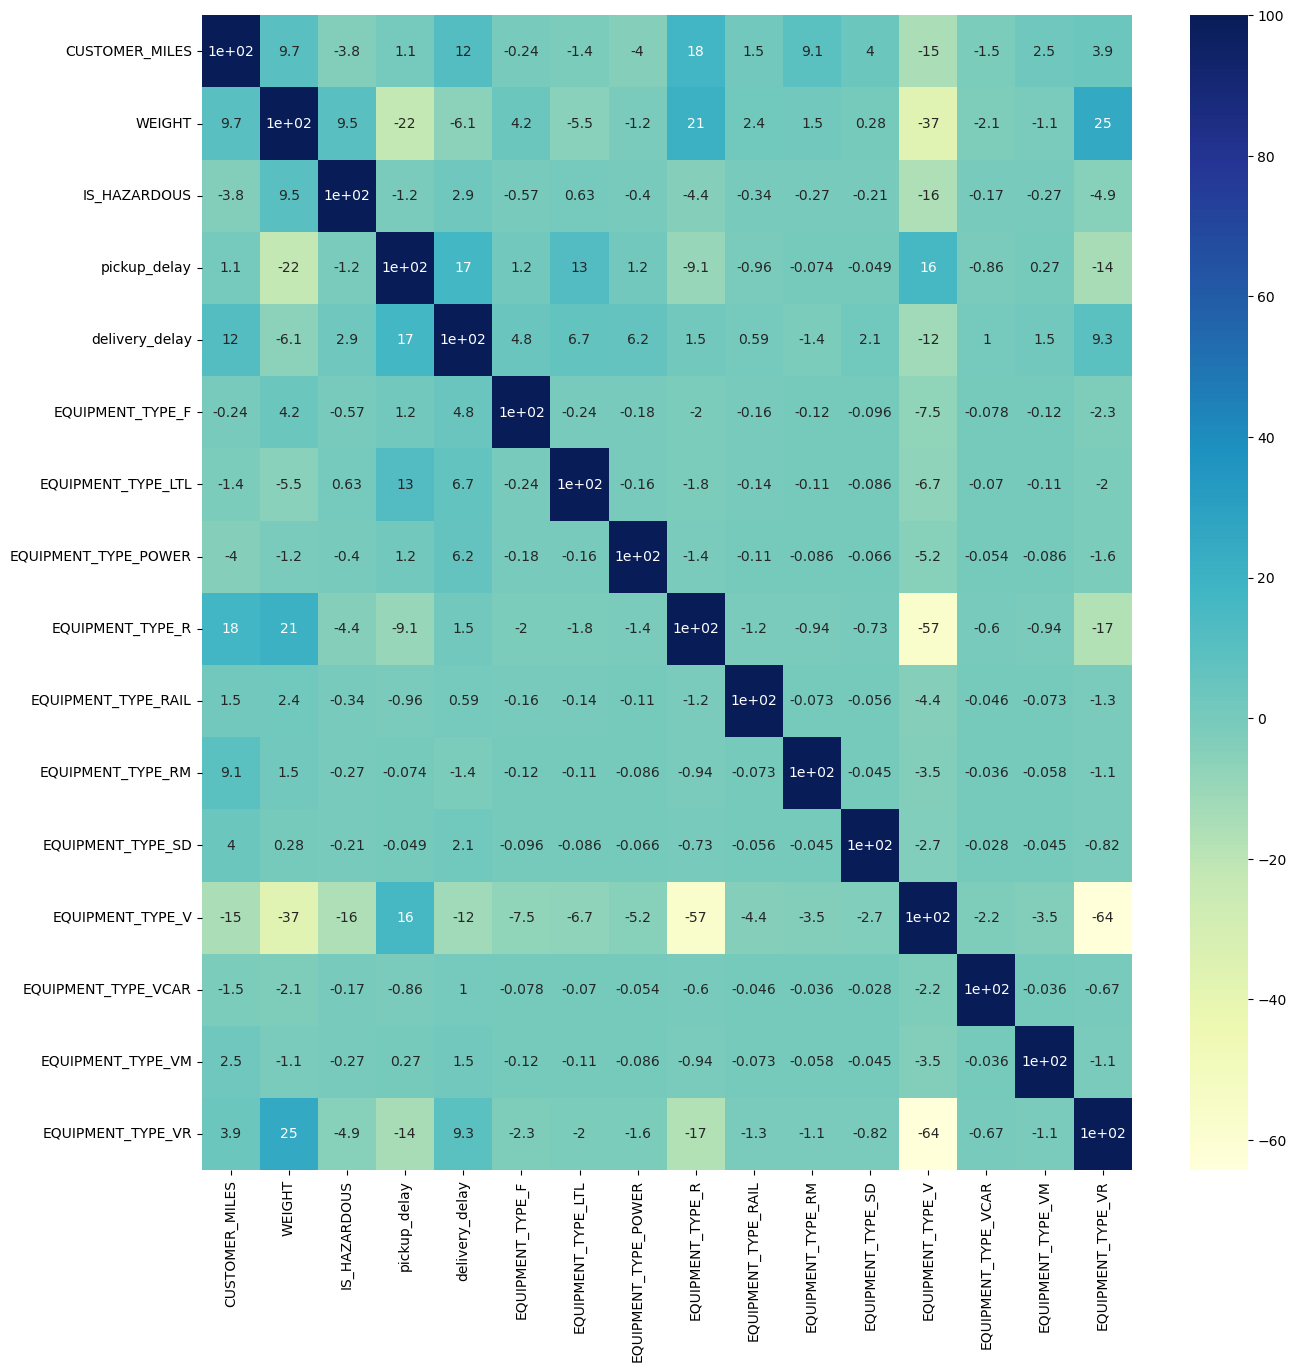

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr()*100, cmap="YlGnBu", annot=True)
plt.show()

In [43]:
X.head()

,CUSTOMER_MILES,WEIGHT,IS_HAZARDOUS,pickup_delay,delivery_delay,EQUIPMENT_TYPE_F,EQUIPMENT_TYPE_LTL,EQUIPMENT_TYPE_POWER,EQUIPMENT_TYPE_R,EQUIPMENT_TYPE_RAIL,EQUIPMENT_TYPE_RM,EQUIPMENT_TYPE_SD,EQUIPMENT_TYPE_V,EQUIPMENT_TYPE_VCAR,EQUIPMENT_TYPE_VM,EQUIPMENT_TYPE_VR
0,802,42000,0,7.5,8.0,0,0,0,0,0,0,0,0,0,0,0
1,0,40500,0,0.0,9.0,0,0,0,0,0,0,0,1,0,0,0
2,774,0,0,33.0,9.0,0,0,0,0,0,0,0,1,0,0,0
3,0,40500,0,0.0,9.0,0,0,0,0,0,0,0,1,0,0,0
4,0,40500,0,0.0,9.0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
#X = X.astype('int64')

In [45]:
#Y = Y.astype('int64')

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

X_train, X_test, y_train, y_test = train_test_split(X,Y, 
                          random_state=42,
                          train_size=0.80, shuffle=True)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)



X_train shape:  (13885, 16)
X_test shape:  (3472, 16)
y_train shape:  (13885, 1)
y_test shape:  (3472, 1)


In [47]:
y_train

array([[ 800.],
       [ 600.],
       [ 450.],
       ...,
       [ 725.],
       [1325.],
       [   0.]])

In [48]:
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
y_train = scaler_Y.fit_transform(y_train)
X_test = scaler_X.transform(X_test)
y_test = scaler_Y.transform(y_test)

In [49]:

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error , r2_score , mean_squared_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.4762934018476698


In [51]:
r2 = r2_score(y_test, y_pred)
r2

0.4843825153430068

In [52]:
mean_squared_error(y_test,y_pred)

0.49651325044737027

In [53]:
print(y_test[:10])

[[-1.04403867]
 [-0.28956027]
 [ 1.4888531 ]
 [-0.45123422]
 [ 1.00383127]
 [ 1.38107047]
 [-0.45123422]
 [ 0.46491813]
 [-0.50512553]
 [-0.28956027]]


In [54]:
print(y_pred[:10])

[[-0.65353863]
 [ 0.07850181]
 [ 0.75382266]
 [-0.59859053]
 [ 0.3782521 ]
 [ 1.51699514]
 [-0.12739313]
 [-0.30623921]
 [-0.09599971]
 [-0.51968365]]


In [58]:
import pickle
pickle.dump(model,open("lr_model.pkl",'wb'))
pickle.dump(scaler_X,open("scalerx.pkl","wb"))
pickle.dump(scaler_Y,open("scalery.pkl","wb"))